# Problem define:
Đưa ra các thông số liên quan của mảnh đất, dự đoán giá/m2 của mảnh đất đó

# Import thư viện

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import category_encoders as ce
from imblearn.over_sampling import SMOTE, SVMSMOTE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error

# READ DATA:

In [2]:
df0 = pd.read_csv('LandTrading.csv')
df0.head()

,Unnamed: 0,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,0,220.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,...,30000.0,136.363636,NaN,NaN,5e958ee8208d0d6d7648f9cc,Phố Linh Lang,10.0,Ngõ 4 ô tô tránh,5e5501cbeb80a7245175e0e4,Phường Cống Vị
1,1,500.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,...,195000.0,390.000000,NaN,NaN,5e958ee8208d0d6d7648f96d,Đường Cao Bá Quát,40.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0e9,Phường Điện Biên
2,2,154.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,...,40000.0,259.740260,NaN,NaN,5e958ee8208d0d6d7648f978,Đường Đội Cấn,20.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0ea,Phường Đội Cấn
3,3,116.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,...,14300.0,123.275862,NaN,NaN,5e958ee8208d0d6d7648f974,Đường Đào Tấn,8.0,Ngõ 3 ô tô tránh,5e5501cbeb80a7245175e0e4,Phường Cống Vị
4,4,195.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,...,26500.0,135.897436,NaN,NaN,5e958ee8208d0d6d7648f97a,Đường Giang Văn Minh,100.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0ec,Phường Kim Mã


In [3]:
df1 = df0[(df0['ten_quan']== 'Quận Long Biên')|(df0['ten_quan']== 'Long Biên')]
df1.head()

,Unnamed: 0,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
12146,12146,500.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de2a,Quận Long Biên,NaN,12.00,...,67500.0,135.000000,NaN,NaN,5e958ee9208d0d6d7648fbf8,Đường Long Biên,NaN,NaN,5e5501cbeb80a7245175e113,Phường Long Biên
12147,12147,124.0,NaN,NaN,5e5501caeb80a7245175dddb,Hà Nội,5e5501caeb80a7245175de2a,Long Biên,NaN,NaN,...,5500.0,44.354839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12148,12148,52.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de2a,Quận Long Biên,NaN,5.17,...,2200.0,42.307692,NaN,NaN,5e958ee9208d0d6d7648fcc4,Đường Vũ Xuân Thiều,NaN,NaN,5e5501cbeb80a7245175e113,Phường Long Biên
12149,12149,76.6,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de2a,Quận Long Biên,NaN,6.07,...,6894.0,90.000000,NaN,NaN,5e958ee9208d0d6d7648fc0a,Đường Nguyễn Văn Cừ,NaN,NaN,5e5501cbeb80a7245175e113,Phường Long Biên
12150,12150,75.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de2a,Quận Long Biên,NaN,NaN,...,3750.0,50.000000,NaN,NaN,5e958ee9208d0d6d7648fcb2,Đường Tư Đình,NaN,NaN,5e5501cbeb80a7245175e113,Phường Long Biên


## DATA INFORMATION:

### INFORMATION:

In [4]:
df1.shape

(4304, 25)

In [5]:
df1.describe()

,Unnamed: 0,dien_tich,phong_ngu,so_tang,mat_tien,lat,long,gia,gia_m2,do_rong_duong
count,4304.000000,4.288000e+03,223.000000,244.000000,1729.000000,4302.000000,4302.000000,4.209000e+03,4.209000e+03,572.000000
mean,14297.500000,8.419675e+05,1.941704,1.889344,9.906698,21.037399,105.897121,7.027560e+05,1.206744e+04,8.409091
std,1242.602108,2.755555e+07,3.985470,1.584405,37.563081,0.215785,0.057842,4.470035e+07,7.706954e+05,14.983991
min,12146.000000,1.400000e-01,1.000000,1.000000,2.200000,11.065152,105.826205,4.500000e-03,2.259778e-06,1.000000
25%,13221.750000,4.700000e+01,1.000000,1.000000,4.000000,21.026428,105.882335,2.730000e+03,5.000000e+01,3.000000
50%,14297.500000,6.800000e+01,1.000000,1.000000,4.830000,21.043331,105.898051,4.550000e+03,6.444444e+01,5.000000
75%,15373.250000,9.630000e+01,2.000000,2.000000,6.000000,21.056363,105.909644,7.000000e+03,8.333333e+01,10.000000
max,16449.000000,9.071686e+08,58.000000,9.000000,670.000000,21.077924,108.422803,2.900000e+09,5.000000e+07,312.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304 entries, 12146 to 16449
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4304 non-null   int64  
 1   dien_tich         4288 non-null   float64
 2   huong_ban_cong    9 non-null      object 
 3   phong_ngu         223 non-null    float64
 4   id_thanh_pho      4304 non-null   object 
 5   ten_thanh_pho     4304 non-null   object 
 6   id_quan           4304 non-null   object 
 7   ten_quan          4304 non-null   object 
 8   so_tang           244 non-null    float64
 9   mat_tien          1729 non-null   float64
 10  noi_that          18 non-null     object 
 11  huong_nha         1147 non-null   object 
 12  so_do             2770 non-null   object 
 13  lat               4302 non-null   float64
 14  long              4302 non-null   float64
 15  gia               4209 non-null   float64
 16  gia_m2            4209 non-null   flo

### DROP FEATURE:

In [7]:
df = df1.drop(['Unnamed: 0','id_thanh_pho','so_tang','ten_thanh_pho','id_quan','ten_quan','du_an','id_duong','id_phuong','project_name','huong_ban_cong','ten_duong','phong_ngu','noi_that','do_rong_duong','gia'],axis=1)

In [8]:
df.shape

(4304, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304 entries, 12146 to 16449
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dien_tich         4288 non-null   float64
 1   mat_tien          1729 non-null   float64
 2   huong_nha         1147 non-null   object 
 3   so_do             2770 non-null   object 
 4   lat               4302 non-null   float64
 5   long              4302 non-null   float64
 6   gia_m2            4209 non-null   float64
 7   do_rong_duong_ml  706 non-null    object 
 8   ten_phuong        3994 non-null   object 
dtypes: float64(5), object(4)
memory usage: 336.2+ KB


In [10]:
df.describe()

,dien_tich,mat_tien,lat,long,gia_m2
count,4.288000e+03,1729.000000,4302.000000,4302.000000,4.209000e+03
mean,8.419675e+05,9.906698,21.037399,105.897121,1.206744e+04
std,2.755555e+07,37.563081,0.215785,0.057842,7.706954e+05
min,1.400000e-01,2.200000,11.065152,105.826205,2.259778e-06
25%,4.700000e+01,4.000000,21.026428,105.882335,5.000000e+01
50%,6.800000e+01,4.830000,21.043331,105.898051,6.444444e+01
75%,9.630000e+01,6.000000,21.056363,105.909644,8.333333e+01
max,9.071686e+08,670.000000,21.077924,108.422803,5.000000e+07


# MISSING & OUTLIER:

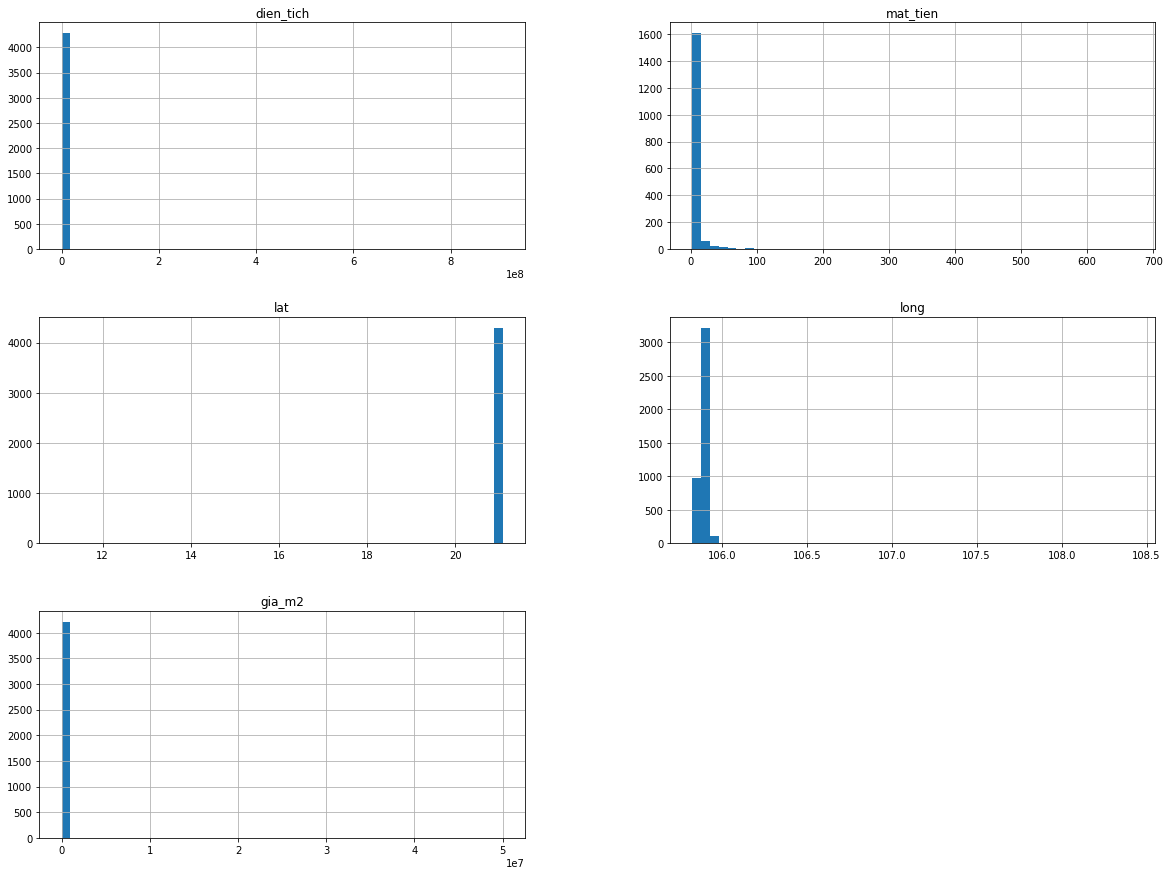

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.show()

+ Biểu đồ có đuôi nặng: chúng mở rộng về một bên của đường trung tuyến xa hơn nhiều so với bên còn lại. 
+ Điều này có thể khiến một số thuật toán Máy học khó phát hiện các mẫu hơn một chút. 
+ Chúng tôi sẽ thử chuyển đổi các thuộc tính này (sử dụng phương pháp IQR) để có nhiều phân phối hình chuông hơn.

## QUANTITATIVE VARIABLES:

### INFORMATION:

In [12]:
numeric_cols = [f for f in df.columns if df[f].dtype !="O"]
print('number of numeric field: ', len(numeric_cols))
print(numeric_cols)

number of numeric field:  5
['dien_tich', 'mat_tien', 'lat', 'long', 'gia_m2']


In [13]:
df[numeric_cols].head()

,dien_tich,mat_tien,lat,long,gia_m2
12146,500.0,12.00,21.030855,105.920818,135.000000
12147,124.0,NaN,21.054863,105.888497,44.354839
12148,52.0,5.17,21.046717,105.925595,42.307692
12149,76.6,6.07,21.049539,105.883412,90.000000
12150,75.0,NaN,21.028867,105.884004,50.000000


In [14]:
df[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304 entries, 12146 to 16449
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dien_tich  4288 non-null   float64
 1   mat_tien   1729 non-null   float64
 2   lat        4302 non-null   float64
 3   long       4302 non-null   float64
 4   gia_m2     4209 non-null   float64
dtypes: float64(5)
memory usage: 201.8 KB


In [15]:
df[numeric_cols].describe()

,dien_tich,mat_tien,lat,long,gia_m2
count,4.288000e+03,1729.000000,4302.000000,4302.000000,4.209000e+03
mean,8.419675e+05,9.906698,21.037399,105.897121,1.206744e+04
std,2.755555e+07,37.563081,0.215785,0.057842,7.706954e+05
min,1.400000e-01,2.200000,11.065152,105.826205,2.259778e-06
25%,4.700000e+01,4.000000,21.026428,105.882335,5.000000e+01
50%,6.800000e+01,4.830000,21.043331,105.898051,6.444444e+01
75%,9.630000e+01,6.000000,21.056363,105.909644,8.333333e+01
max,9.071686e+08,670.000000,21.077924,108.422803,5.000000e+07


### MISSING:

,Total,Percent
mat_tien,2575,59.828067
gia_m2,95,2.207249
dien_tich,16,0.371747
lat,2,0.046468
long,2,0.046468


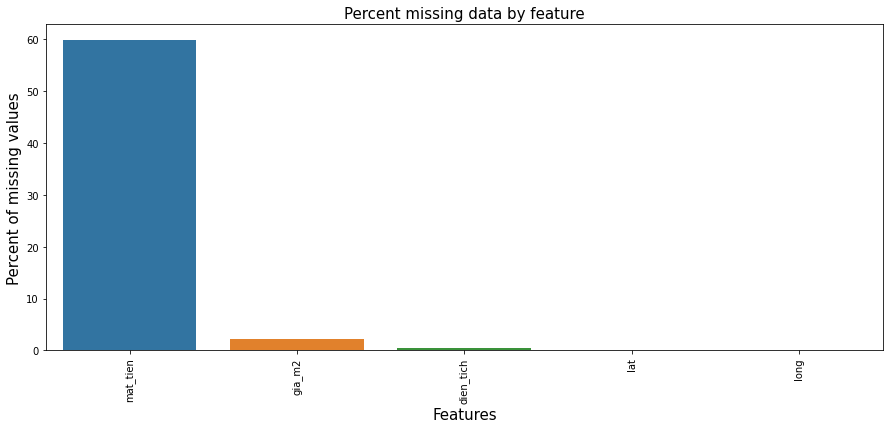

In [16]:
total = df[numeric_cols].isnull().sum().sort_values(ascending=False)
percent = (100*df[numeric_cols].isnull().sum()/df[numeric_cols].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

Tỷ lệ missing trong các numeric feature tương đối cao, cần loại bỏ hoặc điền giá trị thay thế

#### Mat_tien:

In [17]:
df['mat_tien'].fillna(df['mat_tien'].interpolate(),inplace=True)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


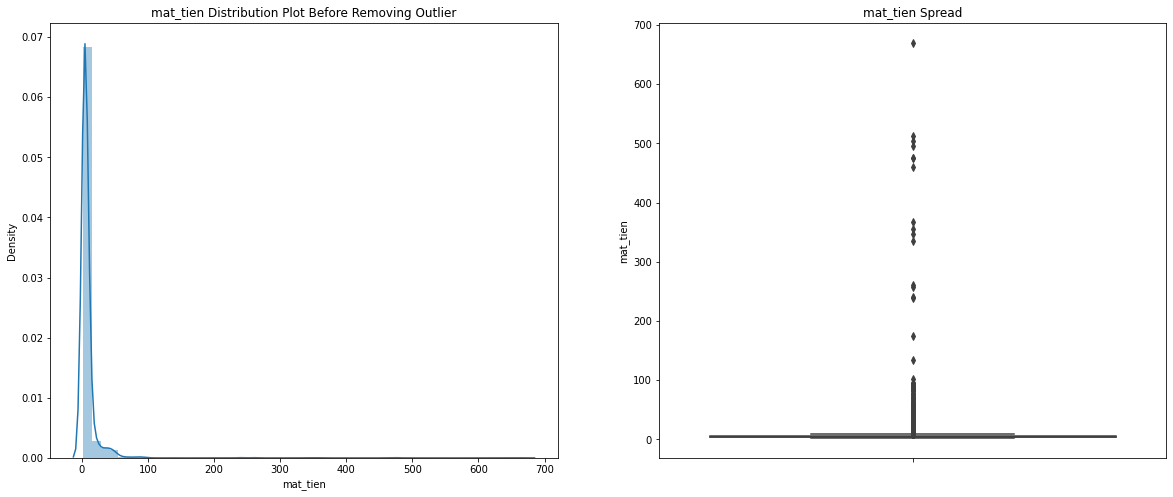

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('mat_tien Distribution Plot Before Removing Outlier')
sns.distplot(df.mat_tien)

plt.subplot(1,2,2)
plt.title('mat_tien Spread')
sns.boxplot(y=df.mat_tien)

plt.show()

In [19]:
q1_mat_tien = df["mat_tien"].quantile(0.25)
q3_mat_tien = df["mat_tien"].quantile(0.75)
IQR_mat_tien = q3_mat_tien - q1_mat_tien

In [20]:
print(IQR_mat_tien)

2.314464285714285


In [21]:
df = df[~((df["mat_tien"] < (q1_mat_tien - 1.5 * IQR_mat_tien)) | (df["mat_tien"] > (q3_mat_tien + 1.5 *IQR_mat_tien)))]

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


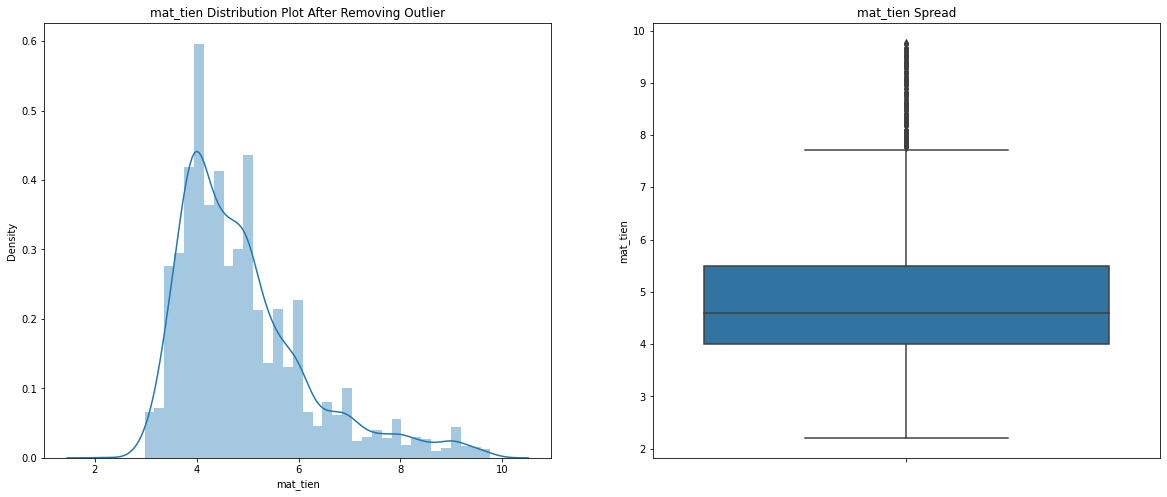

In [22]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('mat_tien Distribution Plot After Removing Outlier')
sns.distplot(df.mat_tien)

plt.subplot(1,2,2)
plt.title('mat_tien Spread')
sns.boxplot(y=df.mat_tien)

plt.show()

#### gia/m2:

In [23]:
df['gia_m2'].isna().sum()

78

In [24]:
df['gia_m2'].fillna(df['gia_m2'].median(),inplace=True)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


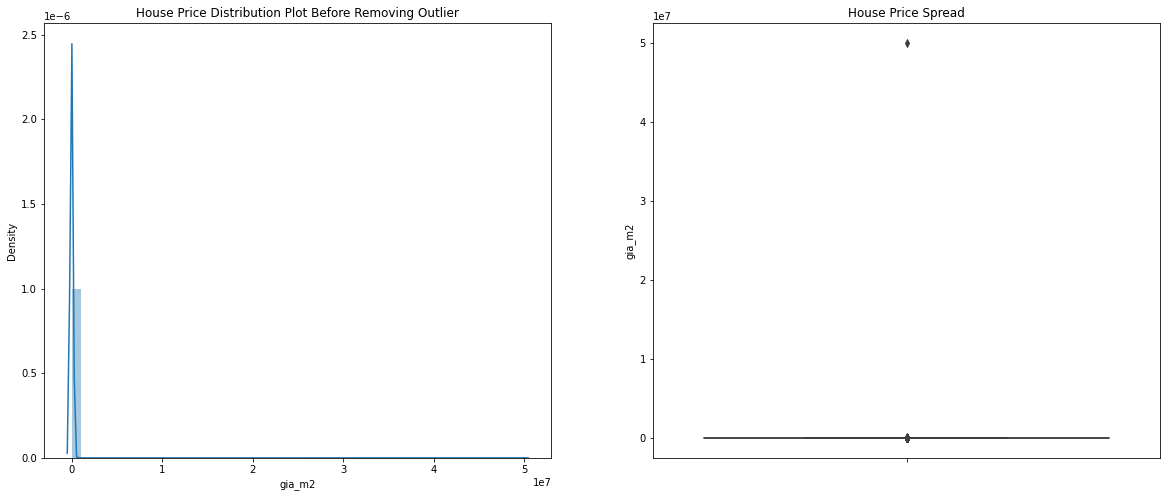

In [25]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot Before Removing Outlier')
sns.distplot(df.gia_m2)

plt.subplot(1,2,2)
plt.title('House Price Spread')
sns.boxplot(y=df.gia_m2)

plt.show()

In [26]:
q1_gia_m2 = df["gia_m2"].quantile(0.25)
q3_gia_m2 = df["gia_m2"].quantile(0.75)
IQR_gia_m2 = q3_gia_m2 -q1_gia_m2

In [27]:
print(IQR_gia_m2)

31.82662996467021


In [28]:
df = df[~((df["gia_m2"] < (q1_gia_m2 - 1.5 * IQR_gia_m2)) | (df["gia_m2"] > (q3_gia_m2 + 1.5 *IQR_gia_m2)))]

In [29]:
df.shape

(3424, 9)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


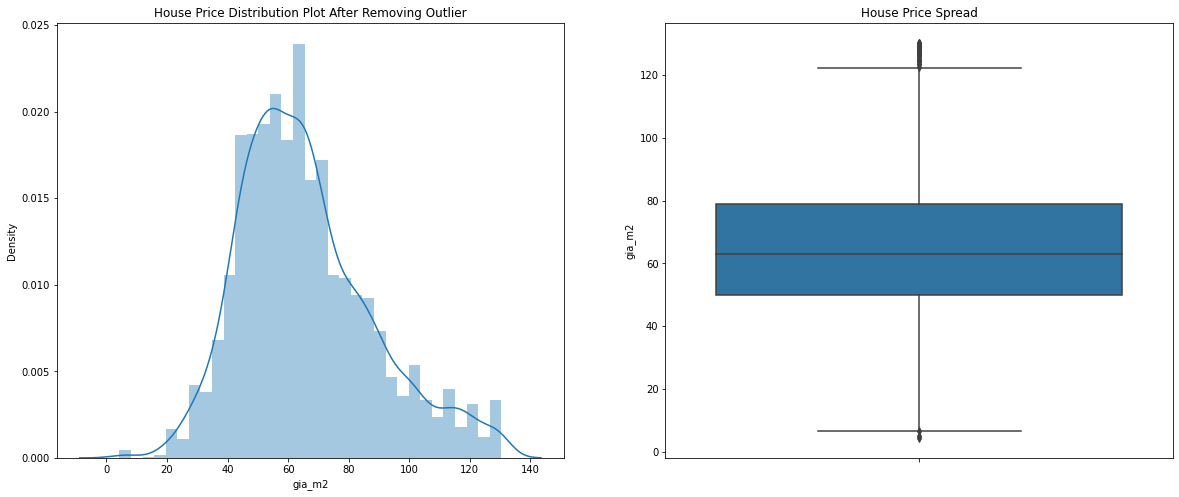

In [30]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot After Removing Outlier')
sns.distplot(df.gia_m2)

plt.subplot(1,2,2)
plt.title('House Price Spread')
sns.boxplot(y=df.gia_m2)

plt.show()

#### dien_tich:

In [31]:
df["dien_tich"].isnull().sum()

13

In [32]:
df['dien_tich'].fillna(df['dien_tich'].interpolate(),inplace=True)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


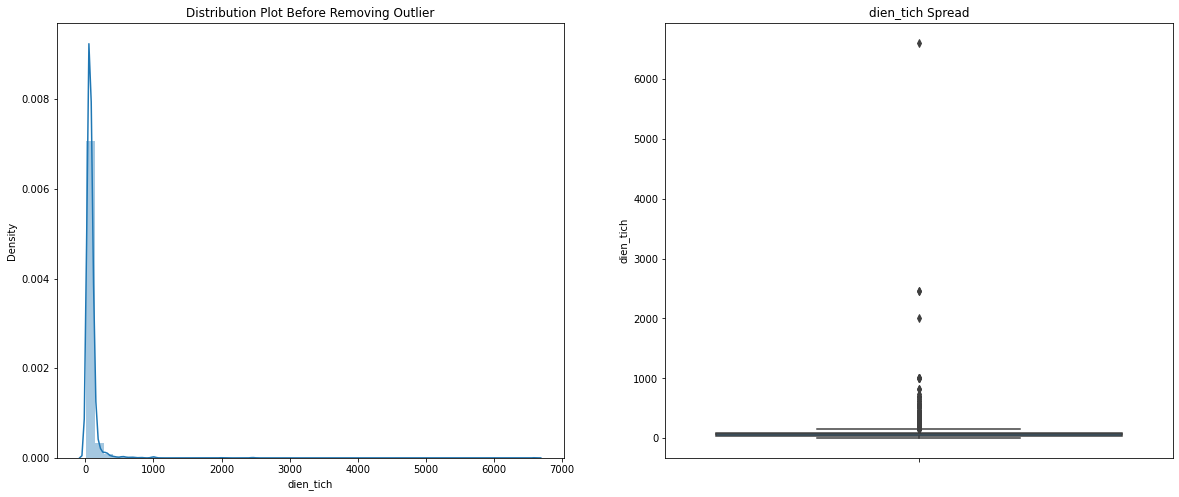

In [33]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribution Plot Before Removing Outlier')
sns.distplot(df.dien_tich)

plt.subplot(1,2,2)
plt.title('dien_tich Spread')
sns.boxplot(y=df.dien_tich)

plt.show()

In [34]:
q1_dien_tich = df["dien_tich"].quantile(0.25)
q3_dien_tich = df["dien_tich"].quantile(0.75)
IQR_dien_tich = q3_dien_tich -q1_dien_tich

In [35]:
print(IQR_dien_tich)

44.0


In [36]:
df = df[~((df["dien_tich"] < (q1_dien_tich - 1.5 * IQR_dien_tich)) | (df["dien_tich"] > (q3_dien_tich + 1.5 *IQR_dien_tich)))]

In [37]:
df.shape

(3264, 9)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


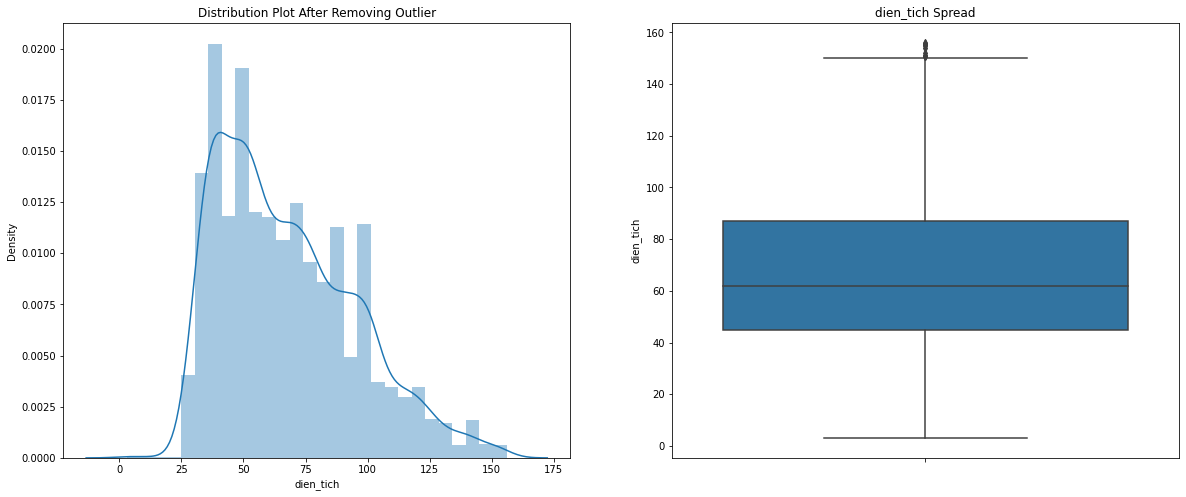

In [38]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribution Plot After Removing Outlier')
sns.distplot(df.dien_tich)

plt.subplot(1,2,2)
plt.title('dien_tich Spread')
sns.boxplot(y=df.dien_tich)

plt.show()

#### lat/long:

In [39]:
df['long'].isna().sum()

2

In [40]:
df.dropna(subset=['long','lat'],inplace=True)

In [41]:
df.shape

(3262, 9)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


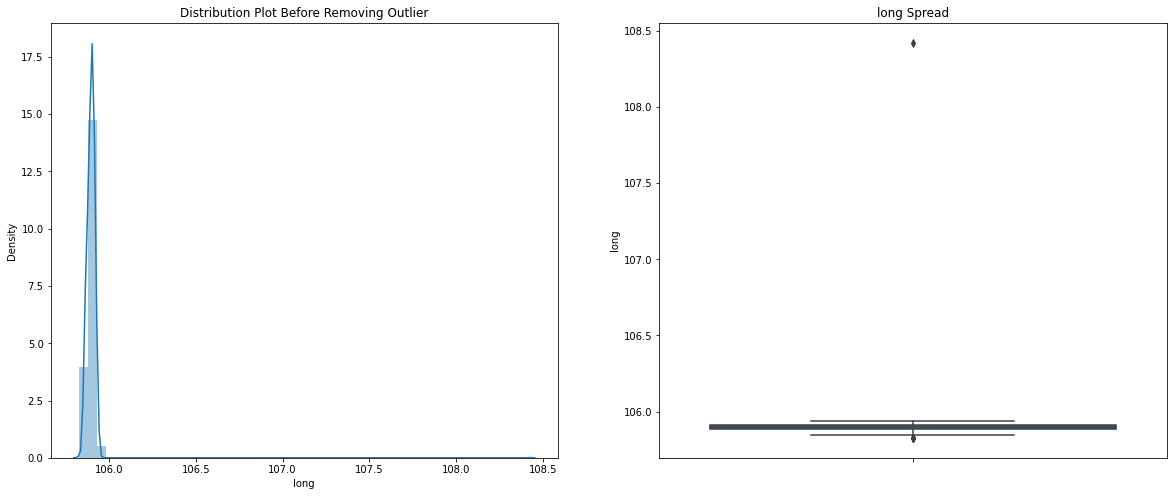

In [42]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribution Plot Before Removing Outlier')
sns.distplot(df.long)

plt.subplot(1,2,2)
plt.title('long Spread')
sns.boxplot(y=df.long)

plt.show()

In [43]:
q1_long = df["long"].quantile(0.25)
q3_long = df["long"].quantile(0.75)
IQR_long = q3_long - q1_long

In [44]:
print(IQR_long)

0.026231899999999087


In [45]:
df = df[~((df["long"] < (q1_long - 1.5 * IQR_long)) | (df["long"] > (q3_long + 1.5 *IQR_long)))]

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


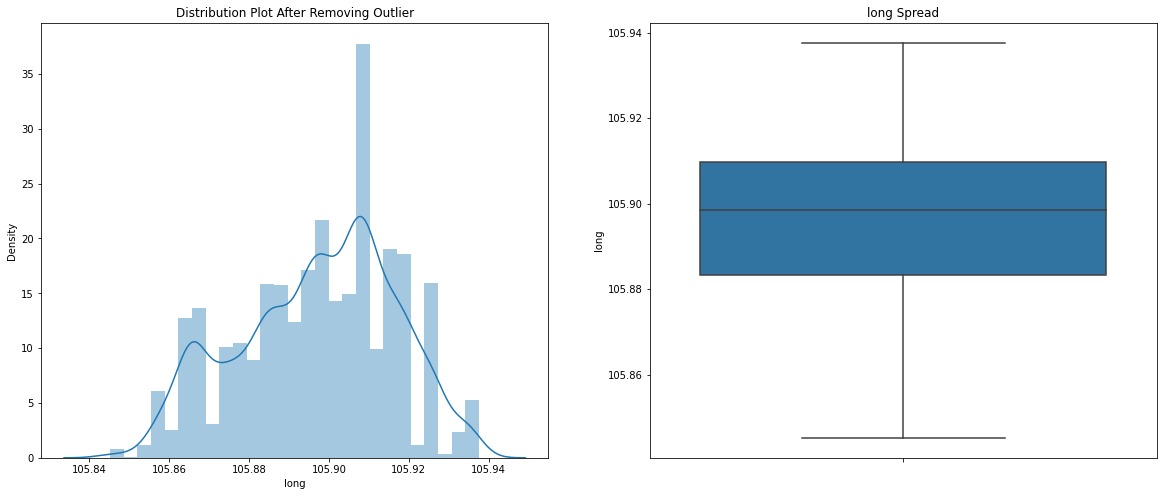

In [46]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribution Plot After Removing Outlier')
sns.distplot(df.long)

plt.subplot(1,2,2)
plt.title('long Spread')
sns.boxplot(y=df.long)

plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


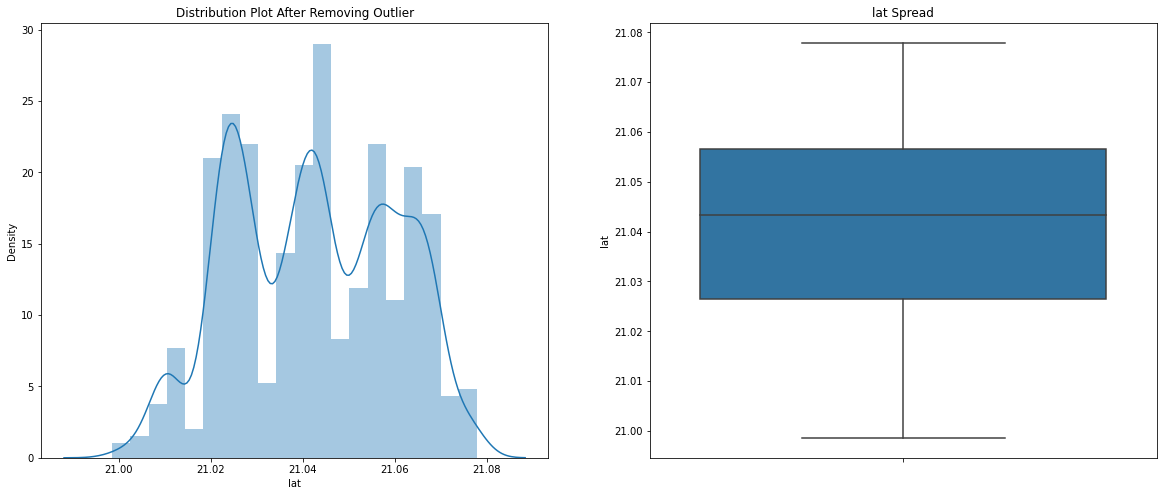

In [47]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribution Plot After Removing Outlier')
sns.distplot(df.lat)

plt.subplot(1,2,2)
plt.title('lat Spread')
sns.boxplot(y=df.lat)

plt.show()

In [48]:
df[numeric_cols].describe()

,dien_tich,mat_tien,lat,long,gia_m2
count,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000
mean,67.449555,4.864760,21.042203,105.897003,66.136378
std,27.583774,1.250951,0.017605,0.019426,22.085149
min,3.000000,2.200000,20.998585,105.845195,4.307692
25%,45.000000,4.000000,21.026428,105.883412,50.370370
50%,62.000000,4.560000,21.043331,105.898542,63.000000
75%,87.000000,5.400000,21.056677,105.909644,79.333333
max,156.000000,9.765217,21.077924,105.937625,130.357143


<AxesSubplot:>

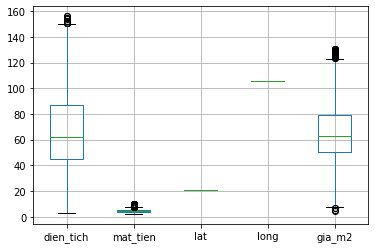

In [49]:
df[numeric_cols].boxplot()

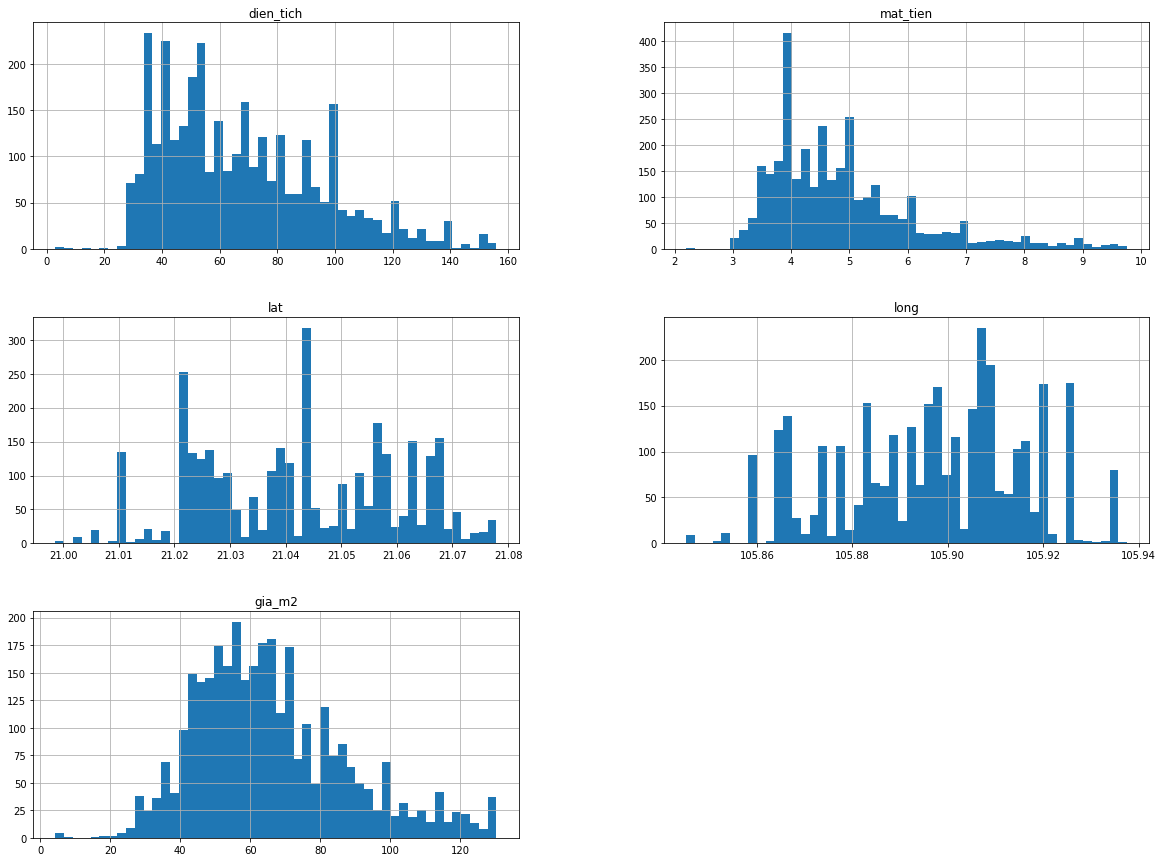

In [50]:
df[numeric_cols].hist(bins=50, figsize=(20,15))
plt.show()

+ Sau khi thực hiện chẩn hoá, có thể thấy phân bố của các thuộc tính đã có phân phối giống với phân phối chuẩn nhiều hơn

In [51]:
print('data còn lại: ' ,3257*100/4204)

data còn lại:  77.47383444338725


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

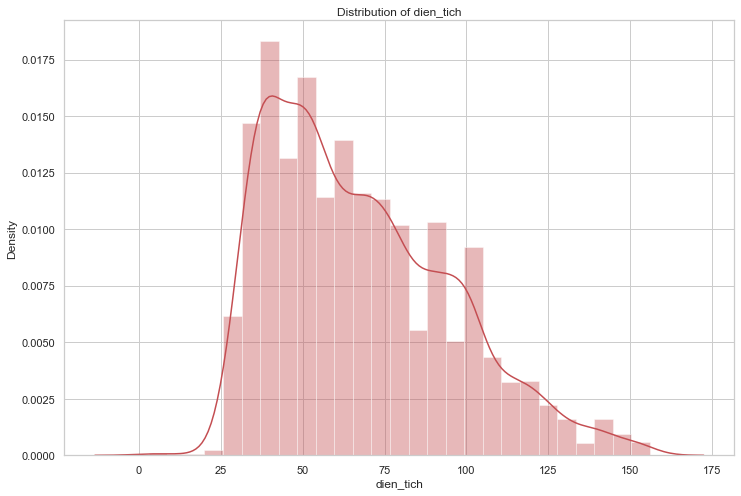

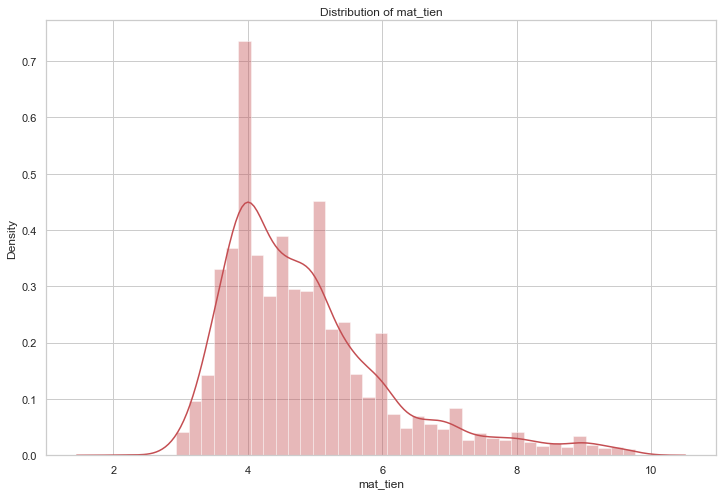

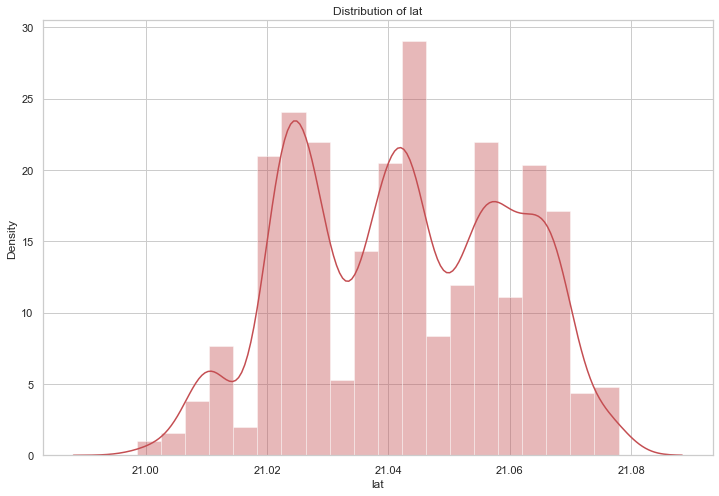

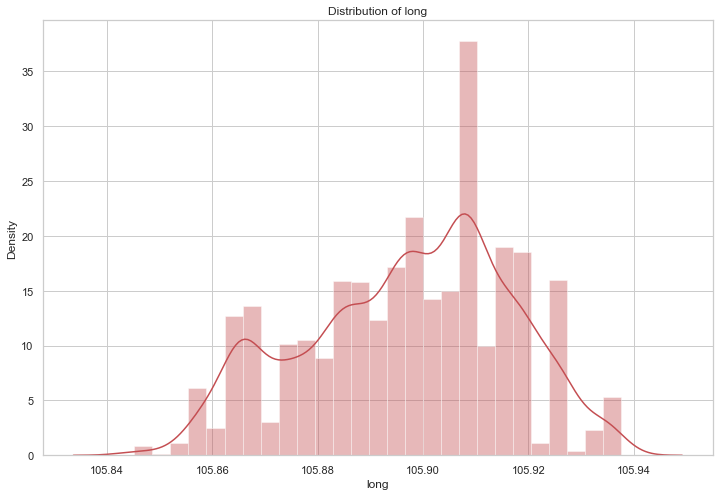

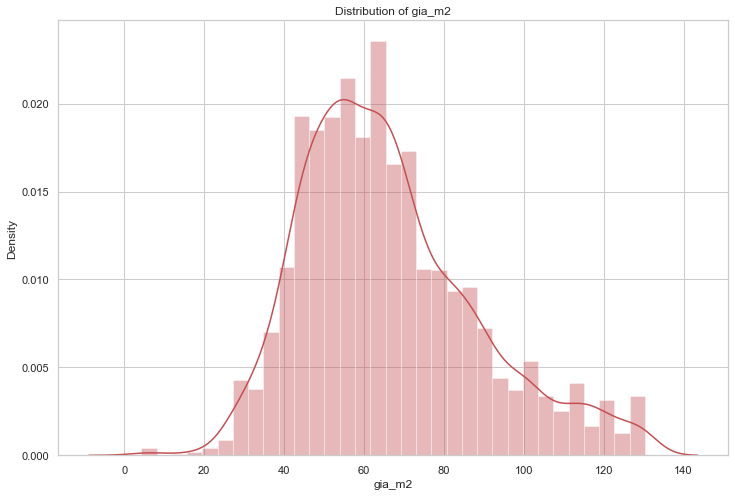

In [52]:
for col in df[numeric_cols]:
    sns.set(style='whitegrid')
    f, ax = plt.subplots(1,1, figsize=(12, 8))
    ax = sns.distplot(df[col], kde = True, color = 'r')
    plt.title(f'Distribution of {col}')

## QUALITATIVE VARIABLES:

### INFORMATION:

In [53]:
object_cols = [f for f in df.columns if df[f].dtype =="O"]
print('number of category field: ', len(object_cols))
print(object_cols)

number of category field:  4
['huong_nha', 'so_do', 'do_rong_duong_ml', 'ten_phuong']


In [54]:
df[object_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3257 entries, 12147 to 16449
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   huong_nha         922 non-null    object
 1   so_do             2066 non-null   object
 2   do_rong_duong_ml  580 non-null    object
 3   ten_phuong        2993 non-null   object
dtypes: object(4)
memory usage: 127.2+ KB


In [55]:
df[object_cols].describe()

,huong_nha,so_do,do_rong_duong_ml,ten_phuong
count,922,2066,580,2993
unique,13,146,6,16
top,KXĐ,Sổ đỏ,Ngõ 1 ô tô,Phường Long Biên
freq,252,906,286,1204


### CLEAN DỮ LIỆU - XỬ LÝ MISSING DATA:

In [56]:
df['ten_phuong'].replace('Thạch Bàn','Phường Thạch Bàn',inplace=True)
df['ten_phuong'].replace('Bồ Đề','Phường Bồ Đề',inplace=True)

,Total,Percent
do_rong_duong_ml,2677,82.192201
huong_nha,2335,71.691741
so_do,1191,36.567393
ten_phuong,264,8.105619


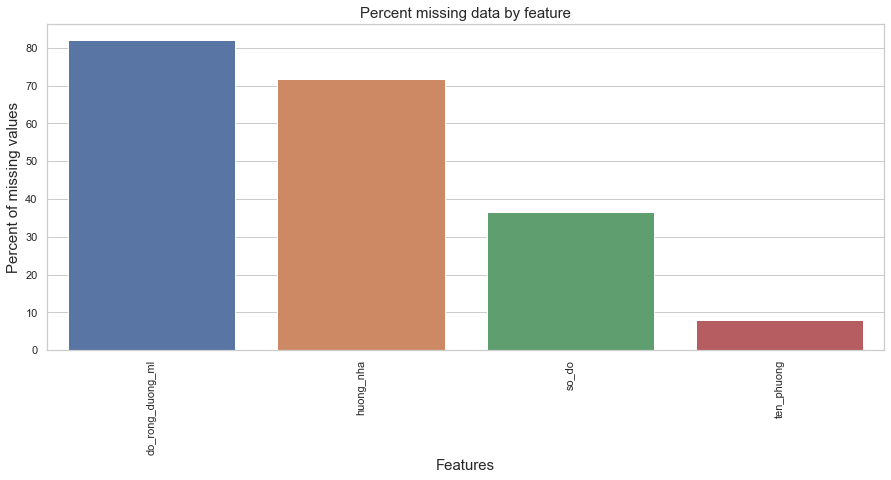

In [57]:
total = df[object_cols].isnull().sum().sort_values(ascending=False)
percent = (100*df[object_cols].isnull().sum()/df[object_cols].isnull().count()).sort_values(ascending=False)
missing_data_ob = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data_ob.index, y=missing_data_ob['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data_ob

In [58]:
df['so_do'].unique()

array(['Đã có sổ', 'Đã có sổ đỏ đầy đủ pháp lý.', nan, 'Sổ đỏ',
       'Sổ hồng/ Sổ đỏ', 'Giấy tờ hợp lệ', 'Giấy tay', 'Sổ đỏ.',
       'Sổ đỏ chính chủ.', 'Sổ hồng', 'Đã có sổ.', 'Đã có sổ đỏ',
       'Sổ đỏ nở hậu.', 'Sổ đỏ chính chủ, ko tranh chấp, ko quy hoạch.',
       'Có sổ.', 'Sổ đẹp.', 'Đã có sổ đỏ.', 'Sổ đỏ chính chủ',
       'SỔ ĐỎ, PHÁP LÝ RÕ RÀNG', 'Sổ chính chủ', 'Sổ đỏ trong két.',
       'Sổ hồng.', 'Sổ đỏ sẵn sàng giao dịch.', 'Có sổ đỏ.',
       'Sổ Đỏ Chính Chủ',
       'Sổ đỏ chính chủ , pháp lý rõ ràng , không tranh chấp',
       'Sổ đỏ: Chính chủ, đất phân lô vuông đẹp, pháp lý đảm bảo',
       'Đã được cấp sổ đỏ.', 'Sổ đỏ chính chủ, pháp lý sạch', 'Sổ đỏ CC',
       'Sổ đỏ trao tay.', 'sổ đỏ chính chủ, sang tên nhanh chóng',
       'Sổ đỏ chính chủ, pháp lý chuẩn, giao dịch ngay',
       'Sổ đỏ chính chủ, pháp lý rõ ràng.', 'ĐÃ CÓ SỔ',
       'đầy đủ thông tin', 'Sổ đỏ lâu dài.', 'SĐCC',
       'Sổ đỏ pháp lý rõ ràng.',
       '- Sổ đỏ: chính chủ, đất phân lô, lô

In [59]:
df['so_do'].fillna(value=0,inplace=True)

In [60]:
df['sodo'] = np.where(df['so_do'] == 0,0,1)

In [61]:
df['sodo'].value_counts()

1    2066
0    1191
Name: sodo, dtype: int64

In [62]:
df['ten_phuong'].mode()

0    Phường Long Biên
Name: ten_phuong, dtype: object

In [63]:
df['ten_phuong'].fillna(value= 'Phường Long Biên',inplace=True)

In [64]:
df['huong_nha']= df['huong_nha'].str.replace('-', ' ')

In [65]:
df['huong_nha'].unique()

array([nan, 'Nam', 'Đông Bắc', 'Tây Bắc', 'Đông Nam', 'Tây Nam', 'Đông',
       'Bắc', 'KXĐ', 'Tây'], dtype=object)

In [66]:
df['huong_nha'].mode()

0    KXĐ
Name: huong_nha, dtype: object

In [67]:
df['huong_nha'].fillna(value='KXĐ',inplace=True)


In [68]:
df['do_rong_duong_ml'].mode()

0    Ngõ 1 ô tô
Name: do_rong_duong_ml, dtype: object

In [69]:
df['do_rong_duong_ml'].fillna(value='Ngõ 1 ô tô',inplace=True)

In [70]:
object_cols

['huong_nha', 'so_do', 'do_rong_duong_ml', 'ten_phuong']

In [71]:
object_cols[1]='sodo'

#### VISUALIZILATION:

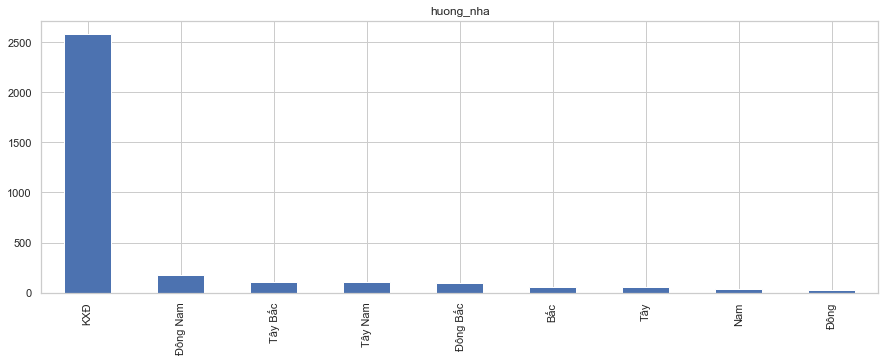

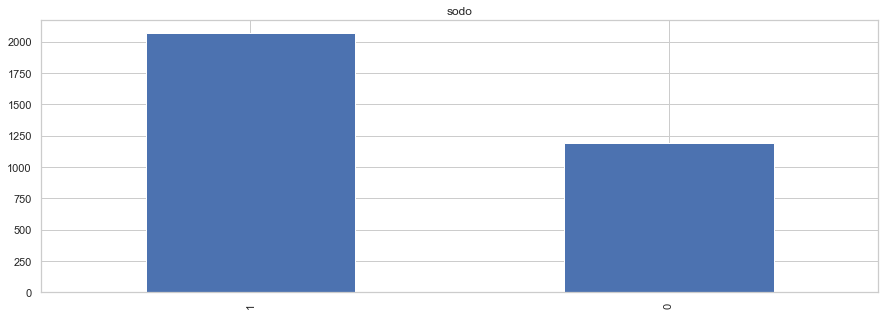

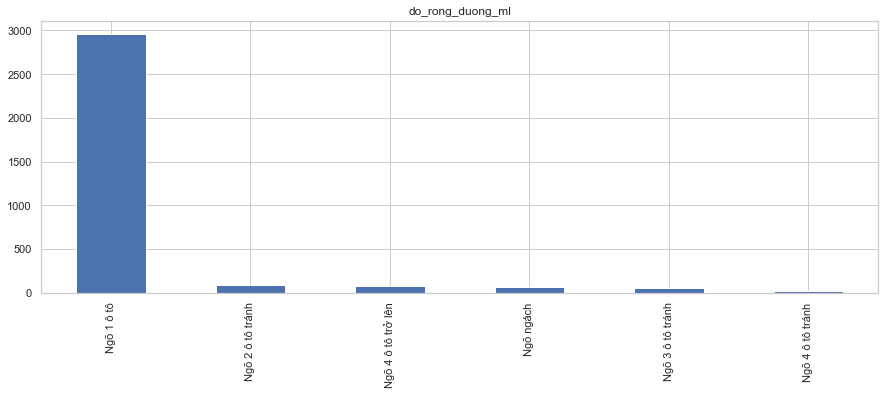

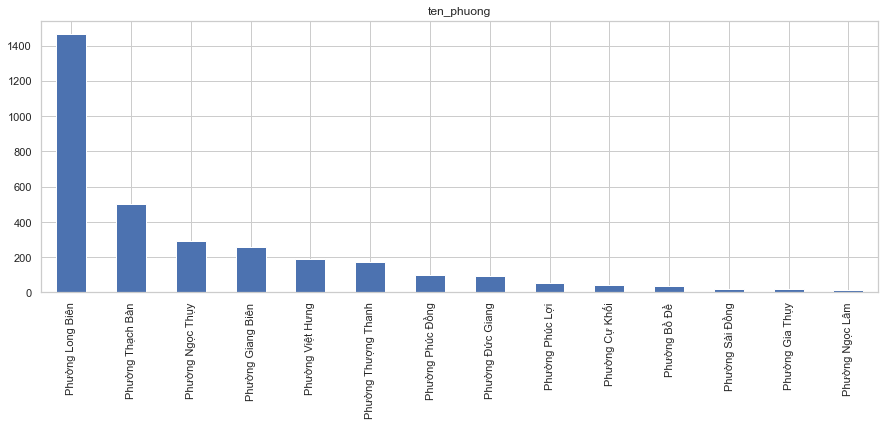

In [72]:
for col in object_cols:
  df[col].value_counts().plot(kind='bar', figsize=(15,5))
  plt.title(col)
  plt.show()

# DATA FOR LINEAR:

In [73]:
dataset_0 = df.copy()

In [74]:
dataset_0.drop(columns='so_do',inplace=True)
dataset_0.head()

,dien_tich,mat_tien,huong_nha,lat,long,gia_m2,do_rong_duong_ml,ten_phuong,sodo
12147,124.0,8.585000,KXĐ,21.054863,105.888497,44.354839,Ngõ 1 ô tô,Phường Long Biên,1
12148,52.0,5.170000,KXĐ,21.046717,105.925595,42.307692,Ngõ 1 ô tô,Phường Long Biên,1
12149,76.6,6.070000,Nam,21.049539,105.883412,90.000000,Ngõ 1 ô tô,Phường Long Biên,0
12150,75.0,6.023051,KXĐ,21.028867,105.884004,50.000000,Ngõ 1 ô tô,Phường Long Biên,1
12151,45.0,5.976102,KXĐ,21.021684,105.895398,64.444444,Ngõ 1 ô tô,Phường Long Biên,1


In [75]:
dataset_0.shape

(3257, 9)

In [76]:
ob_cols= [f for f in dataset_0.columns if dataset_0[f].dtype =="O"]
print('number of category field of dataset_0: ', len(ob_cols))
print(ob_cols)

number of category field of dataset_0:  3
['huong_nha', 'do_rong_duong_ml', 'ten_phuong']


In [77]:
dataset_0[ob_cols].describe()

,huong_nha,do_rong_duong_ml,ten_phuong
count,3257,3257,3257
unique,9,6,14
top,KXĐ,Ngõ 1 ô tô,Phường Long Biên
freq,2587,2963,1468


In [78]:
dataset_0.describe()

,dien_tich,mat_tien,lat,long,gia_m2,sodo
count,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000
mean,67.449555,4.864760,21.042203,105.897003,66.136378,0.634326
std,27.583774,1.250951,0.017605,0.019426,22.085149,0.481693
min,3.000000,2.200000,20.998585,105.845195,4.307692,0.000000
25%,45.000000,4.000000,21.026428,105.883412,50.370370,0.000000
50%,62.000000,4.560000,21.043331,105.898542,63.000000,1.000000
75%,87.000000,5.400000,21.056677,105.909644,79.333333,1.000000
max,156.000000,9.765217,21.077924,105.937625,130.357143,1.000000


In [79]:
dataset_0.to_csv('Land_Price_Predict.csv')

## RECODE CATEGORICAL FEATURE:

In [80]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [81]:
dataset_0 = dummies('huong_nha',dataset_0)
dataset_0 = dummies('do_rong_duong_ml',dataset_0)
dataset_0 = dummies('ten_phuong',dataset_0)

In [82]:
dataset_0.head()

,dien_tich,mat_tien,lat,long,gia_m2,sodo,KXĐ,Nam,Tây,Tây Bắc,...,Phường Long Biên,Phường Ngọc Lâm,Phường Ngọc Thụy,Phường Phúc Lợi,Phường Phúc Đồng,Phường Sài Đồng,Phường Thượng Thanh,Phường Thạch Bàn,Phường Việt Hưng,Phường Đức Giang
12147,124.0,8.585000,21.054863,105.888497,44.354839,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12148,52.0,5.170000,21.046717,105.925595,42.307692,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12149,76.6,6.070000,21.049539,105.883412,90.000000,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
12150,75.0,6.023051,21.028867,105.884004,50.000000,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12151,45.0,5.976102,21.021684,105.895398,64.444444,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [93]:
dataset1 =dataset_0.copy()

In [94]:
dataset = dataset1.copy()

## Correlation:

In [95]:
# View correlation
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,dien_tich,mat_tien,lat,long,gia_m2,sodo,KXĐ,Nam,Tây,Tây Bắc,Tây Nam,Đông,Đông Bắc,Đông Nam,Ngõ 2 ô tô tránh,Ngõ 3 ô tô tránh,Ngõ 4 ô tô tránh,Ngõ 4 ô tô trở lên,Ngõ ngách,Phường Cự Khối,Phường Gia Thụy,Phường Giang Biên,Phường Long Biên,Phường Ngọc Lâm,Phường Ngọc Thụy,Phường Phúc Lợi,Phường Phúc Đồng,Phường Sài Đồng,Phường Thượng Thanh,Phường Thạch Bàn,Phường Việt Hưng,Phường Đức Giang
dien_tich,1.000000,0.184591,0.004895,-0.053424,0.091291,0.043403,0.071380,-0.012781,-0.029410,0.025323,-0.040432,-0.010984,-0.037445,-0.046073,0.044016,0.006966,0.026566,0.040282,-0.100038,-0.002539,-0.036328,-0.001445,0.043583,-0.055014,0.052946,-0.028113,0.053703,-0.008574,-0.001159,-0.117272,0.017228,0.011312
mat_tien,0.184591,1.000000,-0.029641,-0.036411,0.044359,0.018624,0.048615,-0.025602,-0.007744,-0.003456,-0.039476,0.002472,-0.043370,-0.005909,-0.015822,-0.029787,0.042957,0.044164,-0.046173,0.030146,0.001281,-0.017171,-0.028164,0.006502,0.025430,0.004717,0.027244,0.047375,-0.000534,-0.015436,-0.019782,0.021983
lat,0.004895,-0.029641,1.000000,-0.219139,0.014614,-0.074290,0.013811,-0.026398,-0.028672,0.013909,0.026559,-0.012039,-0.044335,0.029479,0.028531,0.027941,-0.023621,0.012175,0.075098,-0.199974,0.033792,0.302598,-0.260588,0.012095,0.283577,0.006459,-0.026801,-0.036020,0.323352,-0.442799,0.190782,0.231296
long,-0.053424,-0.036411,-0.219139,1.000000,-0.106773,-0.019418,-0.089333,0.027153,0.013901,0.025277,0.067533,0.031355,0.027808,-0.000315,-0.004907,0.000236,-0.001075,0.065545,0.028848,0.040477,-0.047097,0.344793,-0.092300,-0.086796,-0.518337,0.204196,0.026531,0.068158,-0.079818,0.254553,0.031153,0.010144
gia_m2,0.091291,0.044359,0.014614,-0.106773,1.000000,0.067281,-0.014625,-0.011816,0.010374,0.028727,0.020517,0.009692,-0.000390,0.011033,0.023851,0.077668,0.070702,0.115607,-0.108361,-0.007229,0.079009,0.026244,0.063778,0.008674,-0.049386,-0.067968,0.005576,-0.002713,-0.060970,-0.096441,0.093380,-0.030213
sodo,0.043403,0.018624,-0.074290,-0.019418,0.067281,1.000000,0.059928,-0.030303,-0.025933,0.003043,-0.028858,-0.005256,-0.048081,-0.001057,-0.181653,-0.119009,-0.080986,-0.170421,-0.175717,0.037555,0.028456,0.067033,-0.155274,0.020653,0.015914,0.041576,0.023010,0.021339,0.015807,0.022702,0.063021,0.029318
KXĐ,0.071380,0.048615,0.013811,-0.089333,-0.014625,0.059928,1.000000,-0.213497,-0.266899,-0.365643,-0.365643,-0.182981,-0.338747,-0.466819,0.015413,-0.012591,0.007201,-0.074873,-0.049857,0.025591,0.026322,-0.097673,-0.029030,0.010217,0.064437,0.032253,0.021324,0.031506,-0.033454,-0.027697,0.041842,0.056614
Nam,-0.012781,-0.025602,-0.026398,0.027153,-0.011816,-0.030303,-0.213497,1.000000,-0.014758,-0.020217,-0.020217,-0.010118,-0.018730,-0.025812,-0.018211,-0.013974,-0.008100,0.062101,-0.015259,0.012483,-0.007870,0.053483,0.010761,-0.007139,-0.024168,-0.014371,-0.018935,-0.008753,-0.012756,0.017183,-0.026967,-0.018833
Tây,-0.029410,-0.007744,-0.028672,0.013901,0.010374,-0.025933,-0.266899,-0.014758,1.000000,-0.025275,-0.025275,-0.012648,-0.023415,-0.032268,0.033718,0.018922,-0.010126,0.027019,-0.002361,-0.015711,-0.009839,0.028973,0.043527,0.026265,-0.026613,-0.017965,-0.023671,-0.010942,-0.011330,0.006020,-0.033712,-0.023543
Tây Bắc,0.025323,-0.003456,0.013909,0.025277,0.028727,0.003043,-0.365643,-0.020217,-0.025275,1.000000,-0.034625,-0.017328,-0.032078,-0.044206,-0.020717,0.016546,-0.013872,-0.004397,0.023447,-0.006567,-0.013479,0.047446,0.006421,-0.012226,-0.016740,-0.024612,-0.002148,-0.014990,0.025084,-0.012944,-0.002374,-0.022109


# MODEL REGRESSION:

## Linear Regression:

In [101]:
X = dataset.drop(columns='gia_m2',axis=1)
y = dataset['gia_m2']

In [102]:
X.describe()

,dien_tich,mat_tien,lat,long,sodo,KXĐ,Nam,Tây,Tây Bắc,Tây Nam,...,Phường Long Biên,Phường Ngọc Lâm,Phường Ngọc Thụy,Phường Phúc Lợi,Phường Phúc Đồng,Phường Sài Đồng,Phường Thượng Thanh,Phường Thạch Bàn,Phường Việt Hưng,Phường Đức Giang
count,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,...,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000
mean,67.449555,4.864760,21.042203,105.897003,0.634326,0.794289,0.011667,0.018115,0.033466,0.033466,...,0.450722,0.004298,0.089960,0.017194,0.029475,0.006448,0.052502,0.153516,0.058029,0.029168
std,27.583774,1.250951,0.017605,0.019426,0.481693,0.404282,0.107399,0.133387,0.179879,0.179879,...,0.497642,0.065431,0.286169,0.130013,0.169160,0.080050,0.223072,0.360539,0.233834,0.168303
min,3.000000,2.200000,20.998585,105.845195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,4.000000,21.026428,105.883412,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.000000,4.560000,21.043331,105.898542,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,87.000000,5.400000,21.056677,105.909644,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,156.000000,9.765217,21.077924,105.937625,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
scaler = StandardScaler()
# Chuẩn hóa dữ liệu trong df với MinMaxScaler:
scaler_columns = ['dien_tich','mat_tien','lat','long']

scaler.fit(X[scaler_columns])
X[scaler_columns] = scaler.transform(X[scaler_columns])

y=y.values
y= y.reshape(-1,1)
y.shape

scaler.fit(y)
y=scaler.transform(y)

In [104]:
X.describe()

,dien_tich,mat_tien,lat,long,sodo,KXĐ,Nam,Tây,Tây Bắc,Tây Nam,...,Phường Long Biên,Phường Ngọc Lâm,Phường Ngọc Thụy,Phường Phúc Lợi,Phường Phúc Đồng,Phường Sài Đồng,Phường Thượng Thanh,Phường Thạch Bàn,Phường Việt Hưng,Phường Đức Giang
count,3.257000e+03,3.257000e+03,3.257000e+03,3.257000e+03,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,...,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000
mean,1.232596e-16,3.490538e-17,-5.904246e-14,1.089430e-13,0.634326,0.794289,0.011667,0.018115,0.033466,0.033466,...,0.450722,0.004298,0.089960,0.017194,0.029475,0.006448,0.052502,0.153516,0.058029,0.029168
std,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,0.481693,0.404282,0.107399,0.133387,0.179879,0.179879,...,0.497642,0.065431,0.286169,0.130013,0.169160,0.080050,0.223072,0.360539,0.233834,0.168303
min,-2.336861e+00,-2.130514e+00,-2.478010e+00,-2.667306e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.139931e-01,-6.913882e-01,-8.961809e-01,-6.997034e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.975941e-01,-2.436602e-01,6.411162e-02,7.922038e-02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.088750e-01,4.279318e-01,8.223366e-01,6.508317e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.210730e+00,3.917986e+00,2.029368e+00,2.091382e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
y

array([[-0.98640419],
       [-1.07911177],
       [ 1.0806939 ],
       ...,
       [-0.0514623 ],
       [-1.093046  ],
       [-0.73075602]])

In [106]:
# Chia train, test:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

In [107]:
X_train.shape

(2605, 31)

In [108]:
X_test.shape

(652, 31)

In [109]:
from sklearn.linear_model import LinearRegression
#Create a regressor object
model_reg= LinearRegression()
#Fit training set to the regressor
model_reg.fit(X_train,y_train)

LinearRegression()

In [110]:
# use model
y_pred = model_reg.predict(X_test)

In [111]:
score=r2_score(y_test,y_pred)
print('R2-score is ',score)
print('Mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('Root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

R2-score is  0.09877823959552834
Mean_sqrd_error is== 0.9509562920730219
Root_mean_squared error of is== 0.9751698785714322


In [112]:
print("mape:", mean_absolute_error(y_test, y_pred))

mape: 0.7537180619567347


In [113]:
model_reg.score(X_train,y_train)

0.11070286208675906

## Decision Tree Regression:

In [114]:
X = dataset.drop(columns='gia_m2',axis=1)
y = dataset['gia_m2']

In [115]:
scaler = StandardScaler()
# Chuẩn hóa dữ liệu trong df với MinMaxScaler:
scaler_columns = ['dien_tich','mat_tien','lat','long']

scaler.fit(X[scaler_columns])
X = scaler.transform(X[scaler_columns])

y=y.values
y= y.reshape(-1,1)
y.shape

scaler.fit(y)
y=scaler.transform(y)

In [116]:
X

array([[ 2.05044927,  2.97438498,  0.71928599, -0.43794615],
       [-0.56018177,  0.24404355,  0.2564985 ,  1.47204486],
       [ 0.33178384,  0.96360645,  0.41681522, -0.69970343],
       ...,
       [ 0.83578066, -0.61143678,  1.38245944, -1.93329163],
       [ 3.06569467, -0.05177675, -0.43652946, -1.16021646],
       [-0.45140547, -0.05177675, -1.15559418,  0.59639205]])

In [117]:
y.shape

(3257, 1)

In [118]:
# Chia train, test:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
model_dtr = DecisionTreeRegressor(random_state=0)
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [120]:
score=r2_score(y_test,y_pred)
print('R2-score is ',score)
print('Mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('Root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

R2-score is  0.09877823959552834
Mean_sqrd_error is== 0.9509562920730219
Root_mean_squared error of is== 0.9751698785714322


In [121]:
y_pred = model_dtr.predict(X_test)
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))

MAPE:  4.152880265219426


In [122]:
model_dtr.score(X_train,y_train)

0.9895860305080144

In [123]:
y_pred.shape

(652,)

In [124]:
data_pred = {'y_pred': np.array(y_pred)}
df_pred = pd.DataFrame(data_pred)
data_test = {'y_test': np.array(y_test)}
df_pred

,y_pred
0,1.091105
1,-0.457199
2,-0.075297
3,0.174969
4,0.155279
...,...
647,-0.178759
648,-0.973361
649,1.701283
650,-1.806304


In [125]:
ytest=pd.DataFrame(y_test)

In [126]:
dataframe = pd.concat([df_pred,ytest],axis=1)
dataframe

,y_pred,0
0,1.091105,-0.808836
1,-0.457199,-1.364763
2,-0.075297,-0.095160
3,0.174969,0.527195
4,0.155279,-0.518477
...,...,...
647,-0.178759,1.125980
648,-0.973361,0.011001
649,1.701283,1.759988
650,-1.806304,-1.053421
